# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [3]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

/Users/denny_home/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 2: Read in your data set 

In [6]:
#Read in data from source 
admissions = pd.read_csv("admissions.csv")
admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [35]:
admissions.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [56]:
#function
admissions.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 4. Drop data points with missing data


In [62]:
admissions_new.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [14]:
admissions_new=admissions.dropna(thresh=4)

In [15]:
#admissions = pd.read_csv("admissions.csv")

null_counts = admissions_new.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: The new count is 397 rows, so 3 rows were dropped from the original dataset.

#### Question 6. Create box plots for GRE and GPA

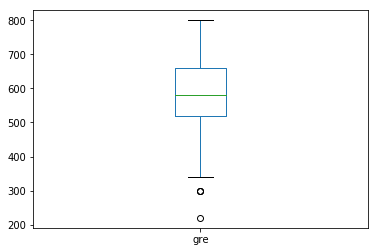

In [10]:
#boxplot 1
admissions['gre'].plot(kind = 'box')

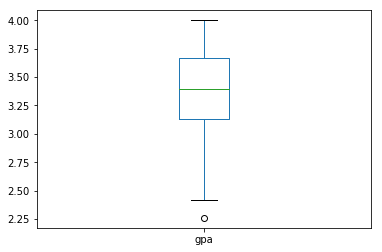

In [9]:
#boxplot 2 
admissions['gpa'].plot(kind = 'box')

#### Question 7. What do these plots show?

Answer: Most of the GRE scores are in the range of 520-660 with outliers at 220 and 800 which means most of the data is above the midpoint of the range 200-800. The GPA scores are mostly above 3.0 while median GPA is 3.4.

#### Question 8. Describe each distribution 

Answer: GRE is negatively skewed and has fat tails. GPA is more negatively skewed and has fatter tails than GRE.

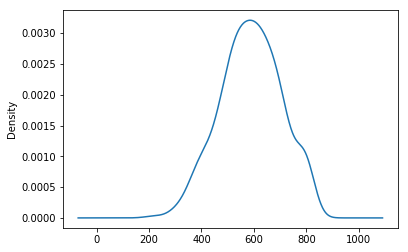

In [12]:
admissions['gre'].plot(kind = 'density')

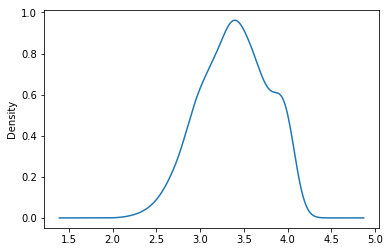

In [14]:
admissions['gpa'].plot(kind = 'density')

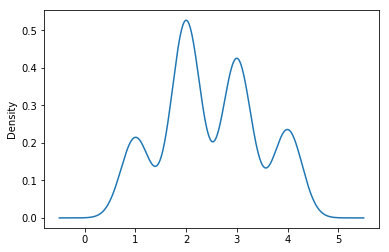

In [15]:
admissions['prestige'].plot(kind = 'density')

In [17]:
#Skewness and Kurtosis
admissions["gre"].skew()

-0.15012666594587223

In [18]:
admissions["gre"].kurt()

-0.3300653381666203

In [19]:
admissions['gpa'].skew()

-0.21176549033509626

In [20]:
admissions["gpa"].kurt()

-0.5746225432149523

In [21]:
admissions["prestige"].skew()

0.09366265355395323

In [22]:
admissions["prestige"].kurt()

-0.8947586133944436

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Both GRE and GPA would not be considered normally distributed. GRE and GPA both exhibit slight negative skewness and both GRE and GPA and Prestige exhibit high negative kurtosis.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Since the GPA and GRE distributions are negatively skewed we could square the individual values to try to reduce this negative skewness.

#### Question 11. Which of our variables are potentially colinear? 

In [7]:
# create a correlation matrix for the data
corr_mat = admissions.corr()

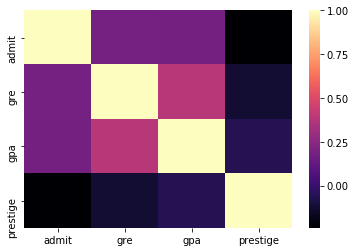

In [8]:
plt.figure()
sns.heatmap(corr_mat, cmap = 'magma')

Answer: GPA and GRE are potentially colinear.

#### Question 12. What did you find?

Answer: 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Start with a OLS linear regression model to gauge R-squared and predictive power of Prestige on grad school admission rates. 

#### Question 14. What is your hypothesis? 

Answer: The analysis will find that the prestige of undergraduation schools shows a statistically significant positive relationship with grad school admission rates. Lower prestige values (ie higher Prestige) will be correlated with higher admissions rates.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data